# Importing the Dependencies

In [1]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
import seaborn as sns

# Collecting the Data and Processing

In [3]:
df=pd.read_csv('Admission_predict.csv')
df

,Serial_No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


# About the Parameters

GRE Scores ( out of 340 )

TOEFL Scores ( out of 120 )

University Rating ( out of 5 )

Statement of Purpose and Letter of Recommendation Strength ( out of 5 )

Undergraduate GPA ( out of 10 )

Research Experience ( either 0 or 1 )

Chance of Admit ( ranging from 0 to 1 )

# Data Analysis

In [4]:
#information regarding the columns
df.columns

Index(['Serial_No.', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance_of_Admit'],
      dtype='object')

In [5]:
#some more information regarding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial_No.         500 non-null    int64  
 1   GRE_Score          500 non-null    int64  
 2   TOEFL_Score        500 non-null    int64  
 3   University_Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance_of_Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
#stastical measures of the data
df.describe()

,Serial_No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
#Checking unique values
df['LOR'].unique()

array([4.5, 3.5, 2.5, 3. , 4. , 1.5, 2. , 5. , 1. ])

In [9]:
df['SOP'].unique()

array([4.5, 4. , 3. , 3.5, 2. , 5. , 1.5, 1. , 2.5])

In [10]:
df['Research'].unique()

array([1, 0], dtype=int64)

In [11]:
df['University_Rating'].unique()

array([4, 3, 2, 5, 1], dtype=int64)

In [12]:
gre_u=df['GRE_Score'].unique()
sort_gre=pd.Series(gre_u).sort_values()
sort_gre

44    290
48    293
41    294
24    295
40    296
47    297
23    298
30    299
26    300
39    301
8     302
18    303
31    304
43    305
42    306
13    307
7     308
37    309
25    310
14    311
19    312
32    313
4     314
38    315
2     316
15    317
17    318
16    319
29    320
6     321
3     322
9     323
1     324
10    325
34    326
11    327
12    328
35    329
5     330
28    331
33    332
46    333
20    334
45    335
21    336
0     337
27    338
36    339
22    340
dtype: int64

In [14]:
toefl_u=df['TOEFL_Score'].unique()
sort_toefl=pd.Series(toefl_u).sort_values()
sort_toefl

28     92
19     93
27     94
25     95
26     96
21     97
18     98
20     99
24    100
7     101
8     102
4     103
2     104
13    105
10    106
1     107
9     108
6     109
3     110
11    111
12    112
23    113
14    114
5     115
15    116
22    117
0     118
16    119
17    120
dtype: int64

In [15]:
Admit_u=df['Chance_of_Admit'].unique()
sort_admit=pd.Series(Admit_u).sort_values()
sort_admit

45    0.34
37    0.36
60    0.37
44    0.38
59    0.39
      ... 
43    0.93
20    0.94
21    0.95
42    0.96
22    0.97
Length: 61, dtype: float64

In [ ]:
#checking missing values
df.isnull().sum()

# Data Visualization

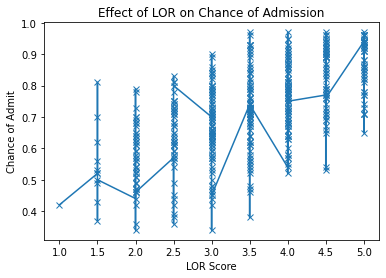

In [16]:
import matplotlib.pyplot as plt

# Sort the DataFrame by LOR scores in ascending order
df_sorted = df.sort_values('LOR')

# Line plot
plt.plot(df_sorted['LOR'], df_sorted['Chance_of_Admit'], marker='x')

# Add labels and title
plt.xlabel('LOR Score')
plt.ylabel('Chance of Admit')
plt.title('Effect of LOR on Chance of Admission')

# Display the plot
plt.show()


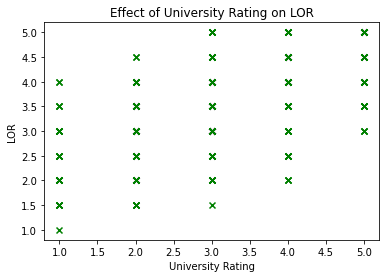

In [17]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(df['University_Rating'],df['LOR'],marker='x',color='green')

# Add labels and title
plt.ylabel('LOR')
plt.xlabel('University Rating')
plt.title('Effect of University Rating on LOR')

# Display the plot
plt.show()


# MODEL PREPARATION

In [18]:
df

,Serial_No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [19]:
x=df.drop(columns=['Serial_No.','Chance_of_Admit'],axis=1)
x

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [20]:
df['Chance_of_Admit'] = df['Chance_of_Admit'].apply(lambda x: 1 if x > 0.5 else 0)


In [21]:
y=df['Chance_of_Admit']
y

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Chance_of_Admit, Length: 500, dtype: int64

In [22]:
df['Chance_of_Admit'].value_counts()

1    461
0     39
Name: Chance_of_Admit, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20,stratify=y, random_state = 0)

# ML CLASSIFICATION MODELS

# 1) LOGISTIC REGRESSION

In [24]:
from sklearn.linear_model import LogisticRegression
model1= 'Logistic Regression'
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_confusion_matrix = confusion_matrix(y_test, lr_predict)
lr_accuracy_score = accuracy_score(y_test, lr_predict)
print("confusion matrix")
print(lr_confusion_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_accuracy_score*100,'\n')
print('--------------------Classification Report-------------------------')
print()
print(classification_report(y_test,lr_predict))

confusion matrix
[[ 3  5]
 [ 0 92]]


Accuracy of Logistic Regression: 95.0 

--------------------Classification Report-------------------------

              precision    recall  f1-score   support

           0       1.00      0.38      0.55         8
           1       0.95      1.00      0.97        92

    accuracy                           0.95       100
   macro avg       0.97      0.69      0.76       100
weighted avg       0.95      0.95      0.94       100



In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

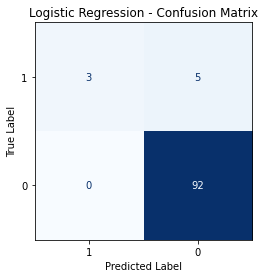

In [26]:


# Create confusion matrix display using ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix=lr_confusion_matrix, display_labels=['1', '0'])
cm_display.plot(cmap=plt.cm.Blues, colorbar=False)

plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# 2)NAIVE BAYE'S

In [27]:
from sklearn.naive_bayes import GaussianNB
model2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_pred = nb.predict(X_test)
nb_confusion_matrix = confusion_matrix(y_test, nb_pred)
nb_accuracy_score = accuracy_score(y_test, nb_pred)
print("confusion matrix")
print(nb_confusion_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_accuracy_score*100,'\n')
print('--------------------Classification Report-------------------------')
print()
print(classification_report(y_test,nb_pred))

confusion matrix
[[ 7  1]
 [12 80]]


Accuracy of Naive Bayes model: 87.0 

--------------------Classification Report-------------------------

              precision    recall  f1-score   support

           0       0.37      0.88      0.52         8
           1       0.99      0.87      0.92        92

    accuracy                           0.87       100
   macro avg       0.68      0.87      0.72       100
weighted avg       0.94      0.87      0.89       100



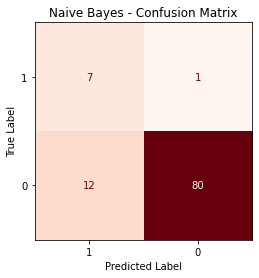

In [28]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=nb_confusion_matrix, display_labels=['1', '0'])
cm_display.plot(cmap=plt.cm.Reds, colorbar=False)

plt.title("Naive Bayes - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# 3) RANDOM FOREST CLASSIFIER

In [29]:
from sklearn.ensemble import RandomForestClassifier
model3="Random Forest"
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf_predict=rf.predict(X_test)
rf_confusion_matrix=confusion_matrix(y_test,rf_predict)
rf_accuracy_score=accuracy_score(y_test,rf_predict)
print("confusion matrix")
print(rf_confusion_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_accuracy_score*100,'\n')
print('--------------------Classification Report-------------------------')
print()
print(classification_report(y_test,rf_predict))

confusion matrix
[[ 3  5]
 [ 0 92]]


Accuracy of Random Forest: 95.0 

--------------------Classification Report-------------------------

              precision    recall  f1-score   support

           0       1.00      0.38      0.55         8
           1       0.95      1.00      0.97        92

    accuracy                           0.95       100
   macro avg       0.97      0.69      0.76       100
weighted avg       0.95      0.95      0.94       100



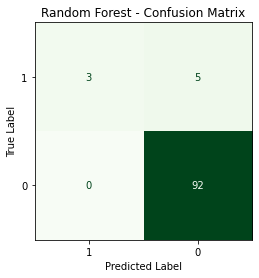

In [30]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=rf_confusion_matrix, display_labels=['1', '0'])
cm_display.plot(cmap=plt.cm.Greens, colorbar=False)

plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 4)EXTREME GRADIENT BOOSTING

In [31]:
from xgboost import XGBClassifier
model4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                   reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_confusion_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_accuracy_score = accuracy_score(y_test, xgb_predicted)
print("confusion matrix")
print(xgb_confusion_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_accuracy_score*100,'\n')
print('--------------------Classification Report-------------------------')
print()
print(classification_report(y_test,xgb_predicted,zero_division=1))

confusion matrix
[[ 0  8]
 [ 0 92]]


Accuracy of Extreme Gradient Boost: 92.0 

--------------------Classification Report-------------------------

              precision    recall  f1-score   support

           0       1.00      0.00      0.00         8
           1       0.92      1.00      0.96        92

    accuracy                           0.92       100
   macro avg       0.96      0.50      0.48       100
weighted avg       0.93      0.92      0.88       100



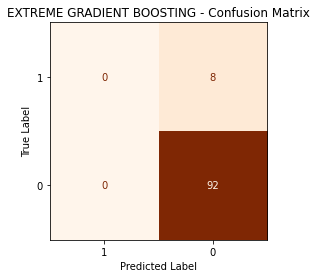

In [32]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=xgb_confusion_matrix, display_labels=['1', '0'])
cm_display.plot(cmap=plt.cm.Oranges, colorbar=False)

plt.title("EXTREME GRADIENT BOOSTING - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [33]:
importances = list(zip(xgb.feature_importances_,df.columns))
importances.sort(reverse=True)
importances

[(0.34721345, 'LOR'),
 (0.303108, 'GRE_Score'),
 (0.13254003, 'Serial_No.'),
 (0.10674642, 'University_Rating'),
 (0.0732441, 'SOP'),
 (0.037148014, 'TOEFL_Score'),
 (0.0, 'CGPA')]

# 5) Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
model5= 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion ='entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_confusion_matrix = confusion_matrix(y_test, dt_predicted)
dt_accuracy_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_confusion_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_accuracy_score*100,'\n')
print('--------------------Classification Report-------------------------')
print()
print(classification_report(y_test,dt_predicted))

confussion matrix
[[ 4  4]
 [ 1 91]]


Accuracy of DecisionTreeClassifier: 95.0 

--------------------Classification Report-------------------------

              precision    recall  f1-score   support

           0       0.80      0.50      0.62         8
           1       0.96      0.99      0.97        92

    accuracy                           0.95       100
   macro avg       0.88      0.74      0.79       100
weighted avg       0.95      0.95      0.94       100



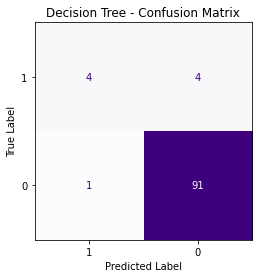

In [35]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=dt_confusion_matrix, display_labels=['1', '0'])
cm_display.plot(cmap=plt.cm.Purples, colorbar=False)

plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 6)K-Nearest Neighbor

In [36]:
from sklearn.neighbors import KNeighborsClassifier
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_confusion_matrix = confusion_matrix(y_test, knn_predicted)
knn_accuracy_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_confusion_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_accuracy_score*100,'\n')
print('--------------------Classification Report-------------------------')
print()
print(classification_report(y_test,knn_predicted))


confussion matrix
[[ 2  6]
 [ 1 91]]


Accuracy of K-NeighborsClassifier: 93.0 

--------------------Classification Report-------------------------

              precision    recall  f1-score   support

           0       0.67      0.25      0.36         8
           1       0.94      0.99      0.96        92

    accuracy                           0.93       100
   macro avg       0.80      0.62      0.66       100
weighted avg       0.92      0.93      0.92       100



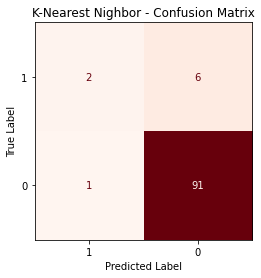

In [37]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=knn_confusion_matrix, display_labels=['1', '0'])
cm_display.plot(cmap=plt.cm.Reds, colorbar=False)

plt.title("K-Nearest Nighbor - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 7) SUPPORT VECTOR MACHINE

In [38]:
from sklearn.svm import SVC
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_confusion_matrix = confusion_matrix(y_test, svc_predicted)
svc_accuracy_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_confusion_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_accuracy_score*100,'\n')
print('--------------------Classification Report-------------------------')
print()
print(classification_report(y_test,svc_predicted,zero_division=1))

confussion matrix
[[ 0  8]
 [ 0 92]]


Accuracy of Support Vector Classifier: 92.0 

--------------------Classification Report-------------------------

              precision    recall  f1-score   support

           0       1.00      0.00      0.00         8
           1       0.92      1.00      0.96        92

    accuracy                           0.92       100
   macro avg       0.96      0.50      0.48       100
weighted avg       0.93      0.92      0.88       100



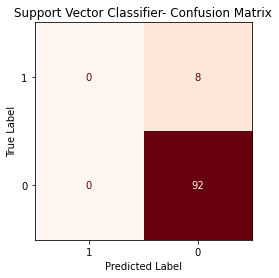

In [39]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=svc_confusion_matrix, display_labels=['1', '0'])
cm_display.plot(cmap=plt.cm.Reds, colorbar=False)

plt.title("Support Vector Classifier- Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 8) ENSEMLING STACKING

In [40]:
from mlxtend.classifier import StackingCVClassifier
scv=StackingCVClassifier(classifiers=[xgb,dt,svc],meta_classifier= svc,random_state=42)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_confusion_matrix = confusion_matrix(y_test, scv_predicted)
scv_accuracy_score = accuracy_score(y_test, scv_predicted)
print("confusion matrix")
print(scv_confusion_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_accuracy_score*100,'\n')
print('--------------------Classification Report-------------------------')
print()
print(classification_report(y_test,scv_predicted,zero_division=1))

confusion matrix
[[ 0  8]
 [ 0 92]]


Accuracy of StackingCVClassifier: 92.0 

--------------------Classification Report-------------------------

              precision    recall  f1-score   support

           0       1.00      0.00      0.00         8
           1       0.92      1.00      0.96        92

    accuracy                           0.92       100
   macro avg       0.96      0.50      0.48       100
weighted avg       0.93      0.92      0.88       100



# RESULTS 

In [41]:
model_evaluation = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine','Stacking CVCalssifier'], 'Accuracy': [lr_accuracy_score*100,
                    nb_accuracy_score*100,rf_accuracy_score*100,xgb_accuracy_score*100,knn_accuracy_score*100,dt_accuracy_score*100,svc_accuracy_score*100,scv_accuracy_score*100]})
print('----------Model Evaluation-----------')
model_evaluation


----------Model Evaluation-----------


,Model,Accuracy
0,Logistic Regression,95.0
1,Naive Bayes,87.0
2,Random Forest,95.0
3,Extreme Gradient Boost,92.0
4,K-Nearest Neighbour,93.0
5,Decision Tree,95.0
6,Support Vector Machine,92.0
7,Stacking CVCalssifier,92.0


From the above we can say thsat logistic regression is sa better classification model for prediction of Graduate Admissions from an Indian perspective

# Important Feature

             Feature  Importance
5               LOR     0.347213
1          GRE Score    0.303108
0         Serial No.    0.132540
3  University Rating    0.106746
4                SOP    0.073244
2        TOEFL Score    0.037148
6               CGPA    0.000000


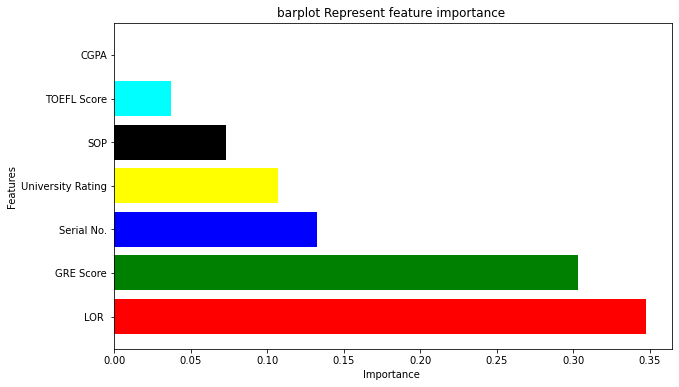

In [42]:
df1 = pd.DataFrame({'Feature':['Serial No.','GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA'],'Importance': xgb.feature_importances_})
df_sorted = df1.sort_values(by='Importance', ascending=False)
print(df_sorted)
plt.figure(figsize=(10,6))
plt.title("barplot Represent feature importance ")
plt.xlabel("Importance ")
plt.ylabel("Features")
c = ['red','green','blue','yellow', 'black', 'cyan', 'orange']
plt.barh(df_sorted['Feature'],df_sorted['Importance'],color = c)
plt.show()

# ROC CURVE

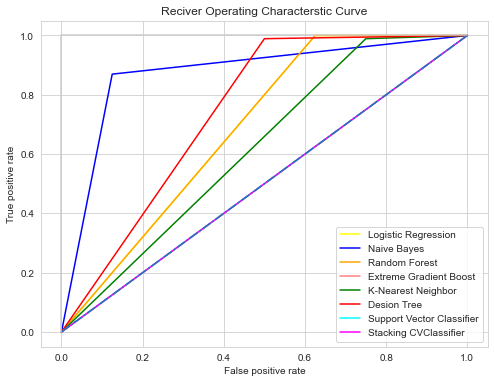

In [43]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nb_pred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predict)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)
scv_false_positive_rate,scv_true_positive_rate,scv_threshold = roc_curve(y_test,scv_predicted)


sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression',color='yellow')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes',color='blue')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest',color='orange')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost',color=(1, 0, 0, 0.5))
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor',color='green')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree',color='red')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier',color='cyan')
plt.plot(scv_false_positive_rate,scv_true_positive_rate,label='Stacking CVClassifier',color='magenta')
plt.plot([0,1],ls='-.')
plt.plot([0,0],[1,0],c='.8')
plt.plot([1,1],c='.8')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

                    Model  Accuracy
0     Logistic Regression      95.0
2           Random Forest      95.0
5           Decision Tree      95.0
4     K-Nearest Neighbour      93.0
3  Extreme Gradient Boost      92.0
6  Support Vector Machine      92.0
7   Stacking CVCalssifier      92.0
1             Naive Bayes      87.0


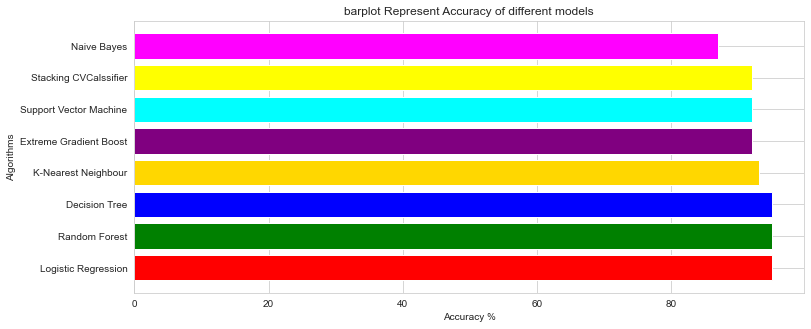

In [44]:
colors = ['red','green','blue','gold','purple','cyan','yellow','magenta']
df_accuracy_score_sorted = model_evaluation.sort_values(by='Accuracy', ascending=False)
print(df_accuracy_score_sorted)
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.barh(df_accuracy_score_sorted['Model'],df_accuracy_score_sorted['Accuracy'],color = colors)
plt.show()

# MODEL EVALUATION

In [45]:
#accuracy on training data
x_training_data=lr.predict(X_train)
training_accuracy_score=accuracy_score(y_train,x_training_data)
print("Accuracy on training data:",training_accuracy_score)

Accuracy on training data: 0.945


In [46]:
#accuracy on ting data
x_testing_data=lr.predict(X_test)
testing_accuracy_score=accuracy_score(y_test,x_testing_data)
print("Accuracy on testing data:",testing_accuracy_score)

Accuracy on testing data: 0.95


# Building a Predictive System

In [47]:
input_data=(337,118,4,4.5,4.5,9.65,1)
input_data_as_numpy_array=np.array(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=lr.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
    print("The person has higher chance of getting graduation admission")
else:
     print("The person has little or no chance of getting graduation admission")
    

[1]
The person has higher chance of getting graduation admission


C:\Users\kakul\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Saving the trained model

In [48]:
import pickle
filename="Admission_model.sav"
pickle.dump(lr,open(filename,'wb'))
#loading the saved model
loaded_model=pickle.load(open("Admission_model.sav",'rb'))

In [49]:
input_data=(337,118,4,4.5,4.5,9.65,1)
input_data_as_numpy_array=np.array(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
    print("The person has higher chance of getting graduation admission")
else:
     print("The person has little or no chance of getting graduation admission")

[1]
The person has higher chance of getting graduation admission


C:\Users\kakul\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
